In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Pregnancies,768,0,0.0,17
Glucose,768,0,0.0,136
BloodPressure,768,0,0.0,47
SkinThickness,768,0,0.0,51
Insulin,768,0,0.0,186
BMI,768,0,0.0,248
DiabetesPedigreeFunction,768,0,0.0,517
Age,768,0,0.0,52
Outcome,768,0,0.0,2


In [ ]:

# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Get the number of duplicate rows
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")


Duplicate Rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Number of duplicate rows: 0


In [ ]:

# Count the occurrences of 0 in specific columns
zero_counts = df[['BloodPressure','SkinThickness','Glucose', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']].apply(lambda x: (x == 0).sum())
zero_counts


,0
BloodPressure,35
SkinThickness,227
Glucose,5
Insulin,374
BMI,11
Age,0
DiabetesPedigreeFunction,0


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness'
                                                                      ,'Insulin','BMI']].replace(0 , np.nan)

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
def median_target(column):
    df[column].fillna(df.groupby('Outcome')[column].transform('median'), inplace=True)


In [ ]:
columns_to_Fill = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns_to_Fill:
    median_target(column)


<ipython-input-42-f39bd712bf10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df.groupby('Outcome')[column].transform('median'), inplace=True)


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# prompt: give me count of outlier in each features

def outlier_count(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

numerical_columns = df.columns.to_list()[:-1]

# Example usage for each relevant column
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    outlier_num = outlier_count(df, col)
    print(f"Number of outliers in {col}: {outlier_num}")


Number of outliers in Glucose: 0
Number of outliers in BloodPressure: 14
Number of outliers in SkinThickness: 87
Number of outliers in Insulin: 51
Number of outliers in BMI: 8
Number of outliers in DiabetesPedigreeFunction: 29
Number of outliers in Age: 9


In [ ]:
numerical_columns = df.columns.to_list()[:-1]
numerical_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]

    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [ ]:
df_cleaned.shape

(579, 9)

In [ ]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               579 non-null    int64  
 1   Glucose                   579 non-null    float64
 2   BloodPressure             579 non-null    float64
 3   SkinThickness             579 non-null    float64
 4   Insulin                   579 non-null    float64
 5   BMI                       579 non-null    float64
 6   DiabetesPedigreeFunction  579 non-null    float64
 7   Age                       579 non-null    int64  
 8   Outcome                   579 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.8 KB


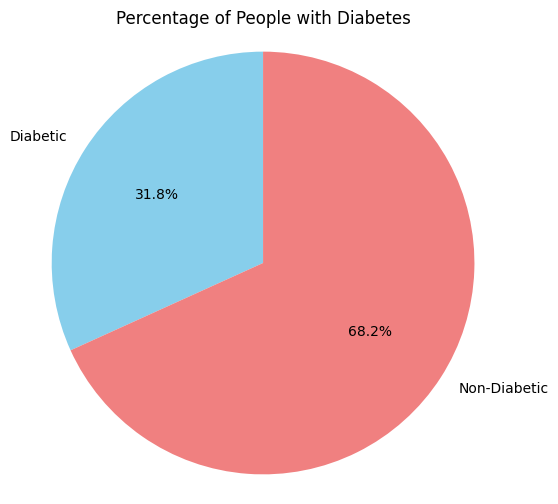

In [ ]:

import matplotlib.pyplot as plt

# Calculate the percentage of people with diabetes
diabetes_percentage = (df_cleaned['Outcome'].sum() / len(df_cleaned)) * 100

# Create the plot
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie([diabetes_percentage, 100 - diabetes_percentage], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of People with Diabetes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_cleaned is already defined

# Separate features (X) and target variable (y)
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       114
           1       0.87      0.78      0.82        60

    accuracy                           0.89       174
   macro avg       0.88      0.86      0.87       174
weighted avg       0.88      0.89      0.88       174

Accuracy: 0.8850574712643678
[[107   7]
 [ 13  47]]


In [ ]:

from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model
logreg = LogisticRegression(max_iter=2000)  # Increased max_iter for convergence
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg}")
# Evaluate the model
print(classification_report(y_test, y_pred_logreg))

print(confusion_matrix(y_test, y_pred_logreg))



Accuracy of Logistic Regression: 0.867816091954023
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       114
           1       0.88      0.72      0.79        60

    accuracy                           0.87       174
   macro avg       0.87      0.83      0.85       174
weighted avg       0.87      0.87      0.86       174

[[108   6]
 [ 17  43]]


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")
# Evaluate the model
print(classification_report(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))



Accuracy of Random Forest Classifier: 0.9252873563218391
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       114
           1       0.91      0.87      0.89        60

    accuracy                           0.93       174
   macro avg       0.92      0.91      0.92       174
weighted avg       0.92      0.93      0.92       174

[[109   5]
 [  8  52]]


In [ ]:

from sklearn.svm import SVC

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='rbf', C=50) # You can adjust the kernel and C parameter
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM Classifier: {accuracy_svm}")

# Evaluate the model
print(classification_report(y_test, y_pred_svm))

print(confusion_matrix(y_test, y_pred_svm))


Accuracy of SVM Classifier: 0.8563218390804598
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       114
           1       0.79      0.80      0.79        60

    accuracy                           0.86       174
   macro avg       0.84      0.84      0.84       174
weighted avg       0.86      0.86      0.86       174

[[101  13]
 [ 12  48]]


In [ ]:

!pip install xgboost

import xgboost as xgb

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42) # You can adjust parameters
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}")

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

print(confusion_matrix(y_test, y_pred_xgb))


Accuracy of XGBoost Classifier: 0.9310344827586207
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       114
           1       0.94      0.85      0.89        60

    accuracy                           0.93       174
   macro avg       0.93      0.91      0.92       174
weighted avg       0.93      0.93      0.93       174

[[111   3]
 [  9  51]]


In [ ]:

import numpy as np

def predict_diabetes(model, scaler, features):
    """
    Predicts diabetes based on user-provided features using a trained model.

    Args:
        model: The trained machine learning model.
        scaler: The MinMaxScaler used to scale the training data.
        features: A list or numpy array of features.  Must be in the same order as the training data columns
                  excluding the 'Outcome' column.

    Returns:
        A string indicating whether the user is predicted to have diabetes ("Diabetic") or not ("Non-Diabetic").
        Returns an error message if the input is invalid.
    """

    try:
        # Convert the input features to a NumPy array
        features_array = np.array(features).reshape(1, -1)

        # Scale the features using the same scaler used for training
        scaled_features = scaler.transform(features_array)

        # Make the prediction
        prediction = model.predict(scaled_features)[0]

        # Return the prediction as a string
        if prediction == 1:
          return "Diabetic"
        else:
          return "Non-Diabetic"

    except ValueError:
        return "Invalid input. Please provide a valid list of 8 numerical features."


# Example Usage (replace with your actual trained model and scaler)
# Assuming you have trained the model and scaler as 'xgb_classifier' and 'scaler'
# Get user input
user_data = []
for col in X.columns:
  val = float(input(f"Enter value for {col}: "))
  user_data.append(val)


prediction_result = predict_diabetes(xgb_classifier, scaler, user_data)
print(f"Prediction: {prediction_result}")


Enter value for Pregnancies: 6
Enter value for Glucose: 148
Enter value for BloodPressure: 72
Enter value for SkinThickness: 35
Enter value for Insulin: 169.5
Enter value for BMI: 33.6
Enter value for DiabetesPedigreeFunction: 0.627
Enter value for Age: 50
Prediction: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
